# 모든 csv 파일을 DataFolder에 저장중입니다 Read 경로 확인하세요

# IMPORT 모아둔거에요

In [1]:
import requests as req 
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import time
import os
from urllib.request import urlretrieve
apart = pd.read_csv('DataFolder/Apart Deal.csv')
from selenium import webdriver as wb 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By


C:\Users\smhrd\AppData\Local\Temp\ipykernel_7192\3879000952.py:12: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  apart = pd.read_csv('DataFolder/Apart Deal.csv')


# 아파트 동 지번등 전처리 코드

In [2]:
#(기본 데이터를 nanUpdate 로 copy 해서 업데이트했음. 다시 기본데이터로 덮어씌우면 됨.)
# 건축년도 NaN값 채우기
nanUpdate = apart.copy()

const_list = []
const_list.append(['조촌동', '더샵디오션시티', '2021'])
const_list.append(['무실동', '더샵원주센트럴파크1단지', '2021'])
const_list.append(['중앙동', '힐스테이트속초센트럴', '2021'])
const_list.append(['가평읍 읍내리', '가평코아루', '2021'])
const_list.append(['송도동', '더샵송도프라임뷰25BL', '2022'])
const_list.append(['오산동', '동탄역유림노르웨이숲', '2022'])
const_list.append(['양촌읍 양곡리', 'My더퍼스트', '2022'])
const_list.append(['신암동', 'SG펠리체', '2021'])


for i in const_list :
    temp = nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])].fillna(i[2]) 
    nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])] = temp

## 지번 NaN 값 채우기

## 
jibun_list = []
jibun_list.append(['남양읍 남양리', '동광뷰엘', '2235'])
jibun_list.append(['내곡동', '서초포레스타2단지', '384'])
jibun_list.append(['자곡동', '래미안포레', '687'])
jibun_list.append(['신원동', '힐스테이트 서초 젠트리스', '557'])
jibun_list.append(['나성동', '나릿재마을1단지', '259-1'])

for i in jibun_list :
    temp = nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])].fillna(i[2])
    nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])] = temp
apart = nanUpdate

# 한국부동산원 데이터 전처리 코드(xlsx 파일입니다 csv 아니에요)

In [3]:

jiCode = pd.read_excel('DataFolder/지역코드원본.xlsx',skiprows = range(11))
# 필요 없는 데이터 처리 

seoul = jiCode.iloc[:, 5:7][7:8]
gunggi = jiCode.iloc[:, 5:7][15:16]
incheonBushan = jiCode.iloc[:, 5:7][23:25]
etc = jiCode.iloc[:, 5:7][28:41]
location = pd.concat([seoul,gunggi,incheonBushan,etc])
location['시도'] = location['regionNm.1']
location['지역번호'] = location['regionCd.1'] 

# 지역코드가 시도만 확인 가능 
sido = location[['시도','지역번호']]

# 지역코드로 시군구 까지 보는 코드
ji = jiCode.iloc[:,9:11]
ji['지역코드'] = ji['regionCd.2']
ji['지역이름'] = ji['regionNm.2']
ji = ji[['지역코드','지역이름']]

#원본 데이터에 시군구 병합
apartji = pd.merge(apart, ji ,how = 'left' , on = '지역코드')

# 시군구 병합 데이터에 시도 병합
apartji['지역코드'] = apartji['지역코드'].astype(str)
apartji['지역번호'] = apartji['지역코드'].str[:2]
sido['지역번호'] = sido['지역번호'].astype(str)
sido['지역번호'] = sido['지역번호'].str[:2]
apart = pd.merge(apartji , sido ,how = 'left' , on = '지역번호')
apart = apart.drop('지역번호',axis = 1)
#display(apart)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_7192\2956511448.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sido['지역번호'] = sido['지역번호'].astype(str)
C:\Users\smhrd\AppData\Local\Temp\ipykernel_7192\2956511448.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sido['지역번호'] = sido['지역번호'].str[:2]


# kosis 인구수 데이터 불러오기 후 전처리 과정 코드
- 주석 한번씩만 읽어주세여

In [4]:

pop = pd.read_csv('DataFolder/2015~2022인구수.csv',encoding = 'euc-kr')
for i in range(5,10):
    pop = pop.drop(f'201{i}.2',axis = 1)
for i in range(5,10):
    pop = pop.drop(f'201{i}.1',axis = 1)
for i in range(20,23):
    pop = pop.drop(f'20{i}.1',axis = 1)
for i in range(20,23):
    pop = pop.drop(f'20{i}.2',axis = 1)
pop = pop.drop(0,axis = 0)
pop.iloc[:, 1:9] = pop.iloc[:, 1:9].astype(int)
pop['인구평균'] = pop.iloc[:,1:9].sum(axis = 1)/8

# 데이터 병합을 위해 시도 컬럼 추가 
pop['시도'] = pop['행정구역(시군구)별'].str[:2]
pop['시도'][12] = '충북'
pop['시도'][13] = '충남'
pop['시도'][14] = '전북'
pop['시도'][15] = '전남'
pop['시도'][16] = '경북'
pop['시도'][17] = '경남'

#필요 없는 컬럼 삭제 -> 년도별 인구수 삭제
# 필요하면 밑에 주석 처리 하고 쓰세염!

popResult = pop[['시도','인구평균']]
#display(popResult)


# 데이터 병합을 원할 때 아래 주석 풀고 쓰세염
# --> 왠만하면 groupby 로 묶은 변수에 병합하는 걸 추천합니다.... 

#apart = pd.merge(apart , popResult ,how = 'left' , on = '시도')

# 연,월,일 칼럼 생성 코드

In [5]:

yymmdd = pd.read_csv('DataFolder/date_oranize_real_real.csv',encoding = 'euc-kr')
apart = pd.concat([apart,yymmdd],axis = 1)
apart = apart.drop('Unnamed: 0',axis = 1)

# 아파트 거래금액 다 숫자 타입으로 변경코드
apart['거래금액'] = apart['거래금액'].astype(str)
apart['거래금액'] = apart['거래금액'].str.replace(',', '')
apart['거래금액'] = apart['거래금액'].astype(int)

# 층 수에 이상치 데이터 처리 코드
apart['층'] = apart['층'].replace(' ','0' )
apart['층'] = apart['층'].astype(int)

# 평수 컬럼도 필요할 수 있으니 추가
apart['평수'] = apart['전용면적']/3.3
apart['평수'] = apart['평수'].round(1)

# 평수당 거래 금액 컬럼 추가
apart['평수당거래금액'] = apart['거래금액']/apart['평수']
apart['평수당거래금액'] = apart['평수당거래금액'].round(1)

# 한글 컬럼으로 변경 
apart = apart.rename(columns = {'year':'거래년'})
apart = apart.rename(columns = {'month':'거래월'})
apart = apart.rename(columns = {'day':'거래일'})

# 데이터 복사 꼭 해두장
apartCopy = apart.copy()

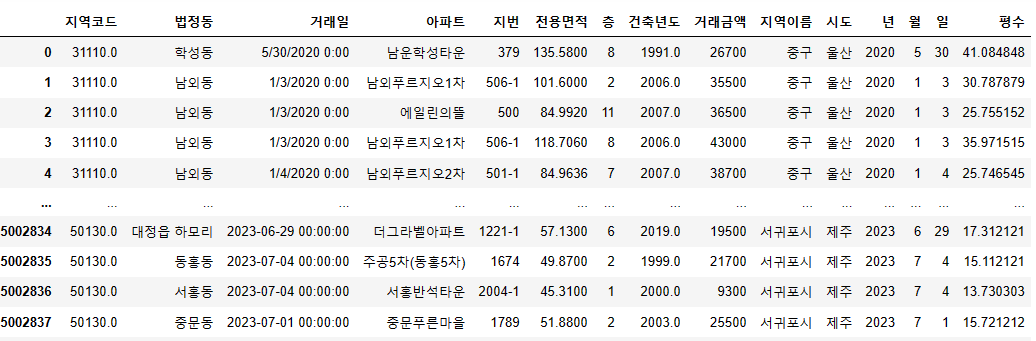

In [6]:
apartCopy#(평수 round,평수당 거래 금액)

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,지역이름,시도,거래년,거래월,거래일,평수,평수당거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,중구,울산,2020,5,30,41.1,649.6
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,중구,울산,2020,1,3,30.8,1152.6
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,중구,울산,2020,1,3,25.8,1414.7
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,중구,울산,2020,1,3,36.0,1194.4
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,중구,울산,2020,1,4,25.7,1505.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,19500,서귀포시,제주,2023,6,29,17.3,1127.2
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,21700,서귀포시,제주,2023,7,4,15.1,1437.1
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,9300,서귀포시,제주,2023,7,4,13.7,678.8
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,25500,서귀포시,제주,2023,7,1,15.7,1624.2


# 2015~ 2023 까지 월별 아파트 거래수 비교

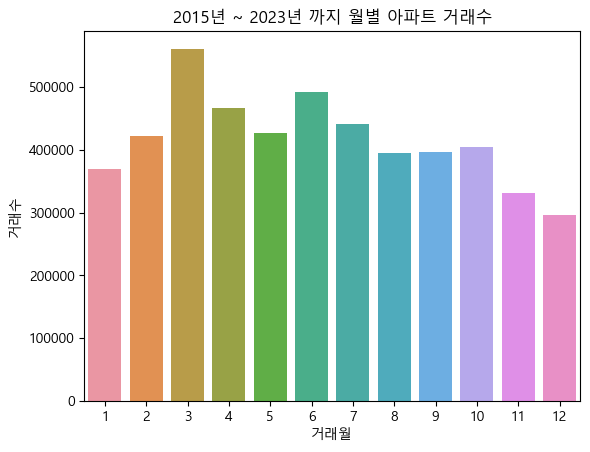

In [7]:
apartCount = apartCopy.groupby('거래월',as_index = False).agg(거래수 = ('거래월','count'))


plt.title('2015년 ~ 2023년 까지 월별 아파트 거래수')
sns.barplot(data = apartCount, x ='거래월' , y = '거래수')
plt.show()

# 혹시 사람들이 선호하는 층이나 평수가 계속 변화하는가?

In [8]:
apartCopy.describe()
display(apartCopy.query('층 > 0').count())

지역코드       5002576
법정동        5002576
거래일        5002576
아파트        5002576
지번         5002576
전용면적       5002576
층          5002576
건축년도       5002576
거래금액       5002576
지역이름       4816002
시도         5002576
거래년        5002576
거래월        5002576
거래일        5002576
평수         5002576
평수당거래금액    5002576
dtype: int64

In [9]:
# 아파트가 1층 이하의 층수가 있는게 신뢰성이 떨어져 1층 이상의 데이터만 추출
apartOver1 = apartCopy[['아파트','층','지역이름']].query('층 > 0')

apartYearFloor= apartCopy.groupby('거래년',as_index = False).agg(층평균 = ('층','mean'))
apartSize = apartCopy.groupby('거래년',as_index = False).agg(평수평균 = ('평수','mean'))

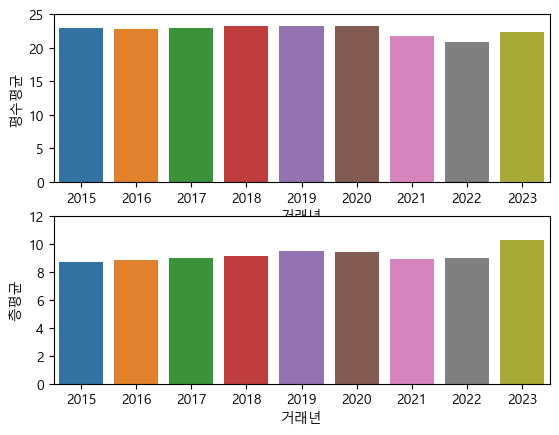

In [10]:
plt.subplot(2,1,1)
sns.barplot(data = apartSize, x= '거래년',y = '평수평균')
plt.ylim(0,25)
plt.subplot(2,1,2)
sns.barplot(data = apartYearFloor, x= '거래년',y = '층평균')
plt.ylim(0,12)
plt.show()

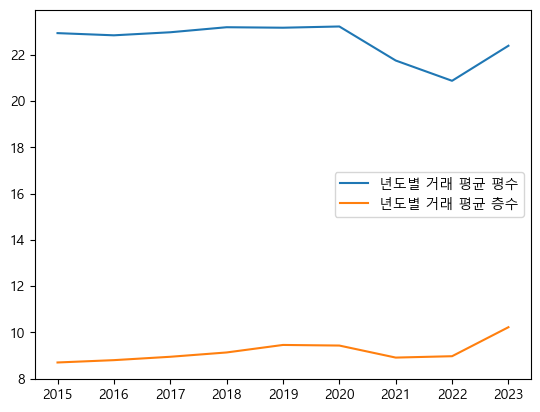

In [11]:
# 비교하기에는 이 차트가 더 보기 편하다만....
plt.plot(apartSize['거래년'],apartSize['평수평균'],label= '년도별 거래 평균 평수' )
plt.plot( apartYearFloor['거래년'],apartYearFloor['층평균'],label = '년도별 거래 평균 층수')
plt.legend()
plt.show()


# 혹시 0층 이하의 데이터와 위의 데이터가 차이가 나는지 비교

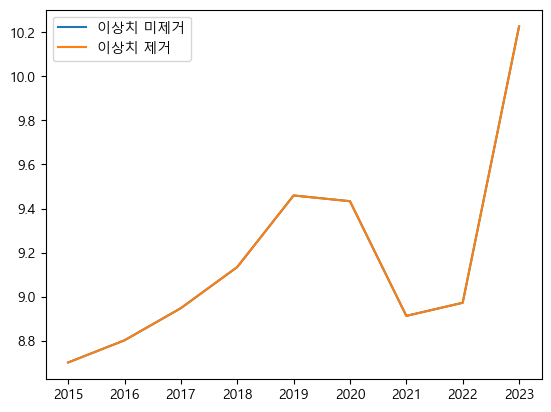

In [12]:
apartYearFloorAll = apartCopy.groupby('거래년',as_index = False).agg(층평균 = ('층','mean'))
plt.plot(apartYearFloorAll['거래년'],apartYearFloorAll['층평균'],label = '이상치 미제거')
plt.plot( apartYearFloor['거래년'],apartYearFloor['층평균'], label = '이상치 제거')
plt.legend()
plt.show()

# 결과에 차이가 나타나지 않음

# 지역별 거래수 확인

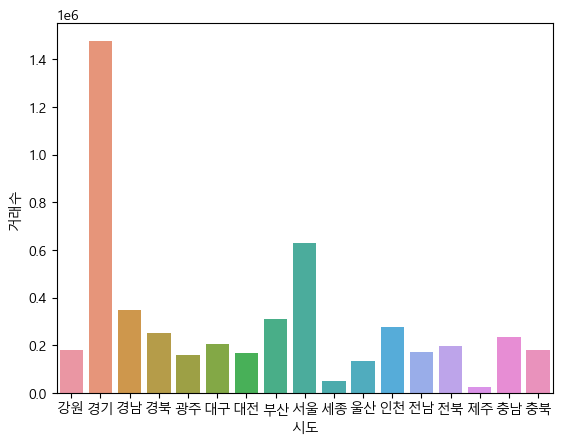

In [13]:
apartTrade = apartCopy.groupby('시도',as_index = False).agg(거래수 = ('시도','count'))
sns.barplot(data = apartTrade, x= apartTrade['시도'],y=apartTrade['거래수'])
plt.show()

# 거래수를 인원수와 비교하면 그래도 수도권이 압도적인가?

In [14]:
apartTrade = apartCopy.groupby('시도').agg(거래수 = ('시도','count'))
apartTradePop = pd.merge(apartTrade, popResult ,how = 'left' , on = '시도')
apartTradePop['비율'] = (apartTradePop['거래수']/apartTradePop['인구평균'])*100

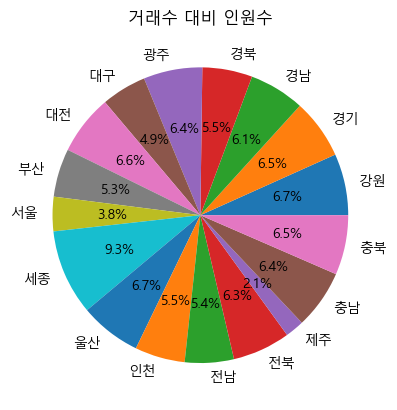

In [15]:
plt.pie(apartTradePop['비율'],labels=apartTradePop['시도'],autopct = '%.1f%%')
plt.title('거래수 대비 인원수')
plt.show()

# 오히려 세종이 압도적이다!

# 혹시 지역별 평균 거래금액도 차이가 있는가?

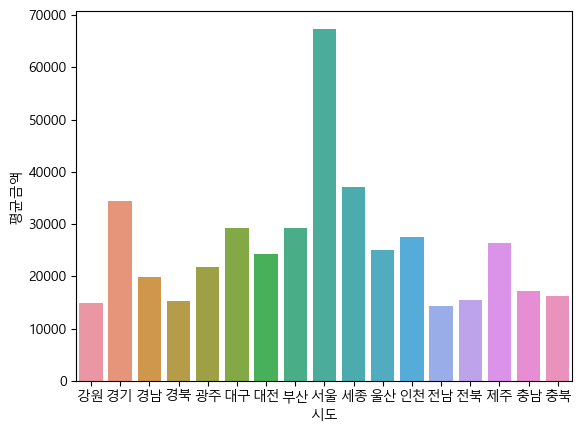

In [16]:
apartPrice = apartCopy.groupby('시도',as_index = False).agg(평균금액 = ('거래금액','mean'))
sns.barplot(data = apartPrice, x= '시도',y='평균금액')
plt.show()

# 광주도 알아보자!

In [17]:
apartGj = apartCopy.query('시도 == "광주"')
apartGjPrice = apartGj.groupby('지역이름',as_index = False).agg(평균거래금액 = ('거래금액','mean'))
apartGjSize = apartGj.groupby('지역이름',as_index = False).agg(평균거래평수 = ('평수','mean'))
apartGjCount = apartGj.groupby('지역이름',as_index = False).agg(평균거래수 = ('지역이름','count'))

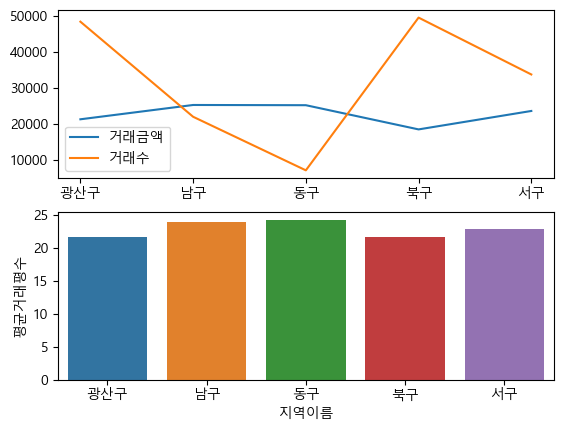

In [18]:
plt.subplot(2,1,1)
plt.plot(apartGjPrice['지역이름'],apartGjPrice['평균거래금액'],label='거래금액')
plt.plot(apartGjCount['지역이름'],apartGjCount['평균거래수'],label = '거래수')
plt.legend()

plt.subplot(2,1,2)
#plt.plot(apartGjSize['지역이름'],apartGjSize['평균거래평수'],label = '거래평수')
sns.barplot(data = apartGjSize, x = '지역이름',y = '평균거래평수')
#plt.legend()
plt.show()

=============================================================================================================

# 우리집 예상 금액을 알아보자!

# 광역시만 구현

In [19]:
apart2223 = apartCopy.copy()
a = str(input('알고싶은 시를 입력하세요 >> '))
b = str(input('구를 입력하세요 >> '))
c = int(input('평수를 입력하세요 >> '))


if a[:2] == '광주':
    apartSi = apart2223.query('시도 == "광주"')
    apartSiPrice = apartSi.groupby('지역이름',as_index = False).agg(평균거래금액 = ('거래금액','mean'))
    apartSiSize = apartSi.groupby('지역이름',as_index = False).agg(평균거래평수 = ('평수','mean'))
    x = apartSiPrice.query(f'지역이름 == "{b}"')
    y = apartSiSize.query(f'지역이름 == "{b}"')
    price = x.iloc[:,1]
    size = y.iloc[:,1]
    z = price/size
    total = int(z.iloc[0]*c)
    print(f'예상금액 : {total}만원 입니다.')
   
elif a[:2] == '서울':
    apartSi = apart2223.query('시도 == "서울"')
    apartSiPrice = apartSi.groupby('지역이름',as_index = False).agg(평균거래금액 = ('거래금액','mean'))
    apartSiSize = apartSi.groupby('지역이름',as_index = False).agg(평균거래평수 = ('평수','mean'))
    x = apartSiPrice.query(f'지역이름 == "{b}"')
    y = apartSiSize.query(f'지역이름 == "{b}"')
    price = x.iloc[:,1]
    size = y.iloc[:,1]
    z = price/size
    total = int(z.iloc[0]*c)
    print(f'예상금액 : {total}만원 입니다.')
   
    
elif a[:2] == '대전':
    apartSi = apart2223.query('시도 == "대전"')
    apartSiPrice = apartSi.groupby('지역이름',as_index = False).agg(평균거래금액 = ('거래금액','mean'))
    apartSiSize = apartSi.groupby('지역이름',as_index = False).agg(평균거래평수 = ('평수','mean'))
    x = apartSiPrice.query(f'지역이름 == "{b}"')
    y = apartSiSize.query(f'지역이름 == "{b}"')
    price = x.iloc[:,1]
    size = y.iloc[:,1]
    z = price/size
    total = int(z.iloc[0]*c)
    print(f'예상금액 : {total}만원 입니다.')
   

elif a[:2] == '대구':
    apartSi = apart2223.query('시도 == "대구"')
    apartSiPrice = apartSi.groupby('지역이름',as_index = False).agg(평균거래금액 = ('거래금액','mean'))
    apartSiSize = apartSi.groupby('지역이름',as_index = False).agg(평균거래평수 = ('평수','mean'))
    x = apartSiPrice.query(f'지역이름 == "{b}"')
    y = apartSiSize.query(f'지역이름 == "{b}"')
    price = x.iloc[:,1]
    size = y.iloc[:,1]
    z = price/size
    total = int(z.iloc[0]*c)
    print(f'예상금액 : {total}만원 입니다.')

elif a[:2] == '인천':
    apartSi = apart2223.query('시도 == "인천"')
    apartSiPrice = apartSi.groupby('지역이름',as_index = False).agg(평균거래금액 = ('거래금액','mean'))
    apartSiSize = apartSi.groupby('지역이름',as_index = False).agg(평균거래평수 = ('평수','mean'))
    x = apartSiPrice.query(f'지역이름 == "{b}"')
    y = apartSiSize.query(f'지역이름 == "{b}"')
    price = x.iloc[:,1]
    size = y.iloc[:,1]
    z = price/size
    total = int(z.iloc[0]*c)
    print(f'예상금액 : {total}만원 입니다.')

elif a[:2] == '부산':
    apartSi = apart2223.query('시도 == "부산"')
    apartSiPrice = apartSi.groupby('지역이름',as_index = False).agg(평균거래금액 = ('거래금액','mean'))
    apartSiSize = apartSi.groupby('지역이름',as_index = False).agg(평균거래평수 = ('평수','mean'))
    x = apartSiPrice.query(f'지역이름 == "{b}"')
    y = apartSiSize.query(f'지역이름 == "{b}"')
    price = x.iloc[:,1]
    size = y.iloc[:,1]
    z = price/size
    total = int(z.iloc[0]*c)
    print(f'예상금액 : {total}만원 입니다.')

elif a[:2] == '울산':
    apartSi = apart2223.query('시도 == "울산"')
    apartSiPrice = apartSi.groupby('지역이름',as_index = False).agg(평균거래금액 = ('거래금액','mean'))
    apartSiSize = apartSi.groupby('지역이름',as_index = False).agg(평균거래평수 = ('평수','mean'))
    x = apartSiPrice.query(f'지역이름 == "{b}"')
    y = apartSiSize.query(f'지역이름 == "{b}"')
    price = x.iloc[:,1]
    size = y.iloc[:,1]
    z = price/size
    total = int(z.iloc[0]*c)
    print(f'예상금액 : {total}만원 입니다.')

else:
    print('미구현')


알고싶은 시를 입력하세요 >> 서울
구를 입력하세요 >> 성북구
평수를 입력하세요 >> 15
예상금액 : 32668만원 입니다.


In [20]:
dong = '법정동 in ["안암동4가","장충동2가","이화동","안암동5가","성북동"]'
apartSi = apart2223.query('시도 == "서울"')
apartSeoul = apartSi.query(dong)
apartSeoul = apartSeoul.groupby('법정동',as_index=False).agg(평당평균거래금액 = ('평수당거래금액','mean'))
apartSeoul['평당평균거래금액(백만원)'] = apartSeoul['평당평균거래금액'].round(1)
#apartSeoul = apartSeoul.groupby('법정동',as_index=False).agg(평당평균거래금액 = ('평수당거래금액',''))
apartSeoul['15평예상금액(백만원)'] = apartSeoul['평당평균거래금액(백만원)']*15

#apartSiPrice = apartSi.groupby('법정동',as_index = False)
#apartSiSize = apartSi.groupby('법정동',as_index = False)
#x = apartSiPrice.query(dong)
#y = apartSiSize.query(dong)

#z = pd.merge(x, y,how = 'left' , on = '법정동')
#price = x.iloc[:,1]
#size = y.iloc[:,1]
#z = price/size
#total = int(z.iloc[0]*c)
#print(f'예상금액 : {total}만원 입니다.')

In [21]:
apartSeoul = apartSeoul.sort_values('평당평균거래금액(백만원)')
apartSeoul['평당평균거래금액(백만원)'] = apartSeoul['평당평균거래금액(백만원)']/100
apartSeoul['15평예상금액(백만원)'] = apartSeoul['15평예상금액(백만원)']/100
apartSeoul['평당평균거래금액(백만원)'] = apartSeoul['평당평균거래금액(백만원)'].round(1)
apartSeoul['15평예상금액(백만원)'] = apartSeoul['15평예상금액(백만원)'].round(1)
apartSeoul = apartSeoul.drop('평당평균거래금액',axis = 1)
apartSeoul = apartSeoul.drop('15평예상금액(백만원)',axis = 1)
apartSeoul

,법정동,평당평균거래금액(백만원)
1,안암동4가,10.1
4,장충동2가,10.4
0,성북동,14.8
3,이화동,14.9
2,안암동5가,16.4


In [22]:
apartS = apartCopy.query('시도 =="서울"')
apartS = apartS.query('거래년 == 2022')
apartS = apartS.groupby('법정동',as_index = False).agg(평당평균거래금액 = ('평수당거래금액','mean')).sort_values('평당평균거래금액').head(5)
apartS['평당평균거래금액(백만원)'] = apartS['평당평균거래금액'].round(1)
apartS['2024 평당평균예상금액(백만원)'] = apartS['평당평균거래금액(백만원)']*1.116




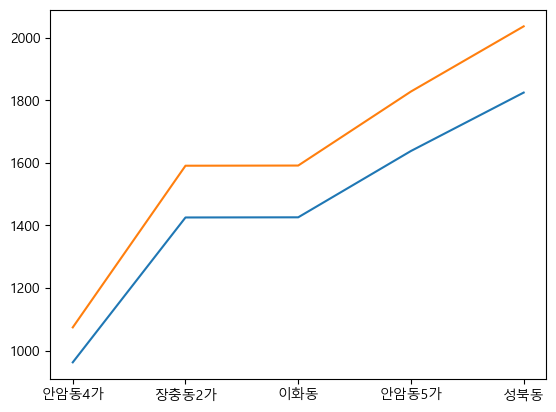

In [23]:
apartB = apartS.query('법정동 == "안암동4가"')
apartJ = apartS.query('법정동 == "장충동2가"')
apartE = apartS.query('법정동 == "이화동"')
apartA = apartS.query('법정동 == "안암동5가"')
apartSS = apartS.query('법정동 == "성북동"')
plt.plot(apartS['법정동'],apartS[['평당평균거래금액(백만원)','2024 평당평균예상금액(백만원)']])


In [24]:
apartS

,법정동,평당평균거래금액,평당평균거래금액(백만원),2024 평당평균예상금액(백만원)
170,안암동4가,962.466667,962.5,1074.1500
233,장충동2가,1425.300000,1425.3,1590.6348
221,이화동,1425.800000,1425.8,1591.1928
171,안암동5가,1637.700000,1637.7,1827.6732
136,성북동,1824.300000,1824.3,2035.9188


In [25]:
b= '미근동'
    
apartSi = apart2223.query('시도 == "서울"')
apartSiPrice = apartSi.groupby('법정동',as_index = False).agg(평균거래금액 = ('거래금액','mean'))
apartSiSize = apartSi.groupby('법정동',as_index = False).agg(평균거래평수 = ('평수','mean'))
x = apartSiPrice.query(f'법정동 == "{b}"')
y = apartSiSize.query(f'법정동 == "{b}"')
price = x.iloc[:,1]
size = y.iloc[:,1]
z = price/size
#total = int(z.iloc[0]*c)
    #total5 = total*1.2
#print(f'예상금액 : {total}만원 입니다.')
apartSi.query('법정동 == "미근동"')

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,지역이름,시도,거래년,거래월,거래일,평수,평수당거래금액
694170,11410.0,미근동,9/3/2018 0:00,서소문,215,39.67,7,1971.0,14500,서대문구,서울,2018,9,3,12.0,1208.3
694171,11410.0,미근동,9/7/2018 0:00,서소문,215,42.64,4,1971.0,17000,서대문구,서울,2018,9,7,12.9,1317.8
2867904,11410.0,미근동,2016-01-11 00:00:00,서소문,215,39.34,2,1971.0,12000,서대문구,서울,2016,1,11,11.9,1008.4
2867905,11410.0,미근동,2016-01-16 00:00:00,서소문,215,42.64,4,1971.0,12900,서대문구,서울,2016,1,16,12.9,1000.0
2868118,11410.0,미근동,2016-02-18 00:00:00,서소문,215,42.64,2,1971.0,13300,서대문구,서울,2016,2,18,12.9,1031.0
2868423,11410.0,미근동,2016-03-24 00:00:00,서소문,215,42.64,2,1971.0,13200,서대문구,서울,2016,3,24,12.9,1023.3
2869739,11410.0,미근동,2016-07-13 00:00:00,서소문,215,42.64,6,1971.0,13800,서대문구,서울,2016,7,13,12.9,1069.8
2870410,11410.0,미근동,2016-09-05 00:00:00,서소문,215,57.85,2,1971.0,16500,서대문구,서울,2016,9,5,17.5,942.9
3537144,11410.0,미근동,2015-06-04 00:00:00,서소문,215,42.64,7,1971.0,10700,서대문구,서울,2015,6,4,12.9,829.5
3537145,11410.0,미근동,2015-06-24 00:00:00,서소문,215,39.67,5,1971.0,11800,서대문구,서울,2015,6,24,12.0,983.3


<Axes: xlabel='시도', ylabel='거래평균'>

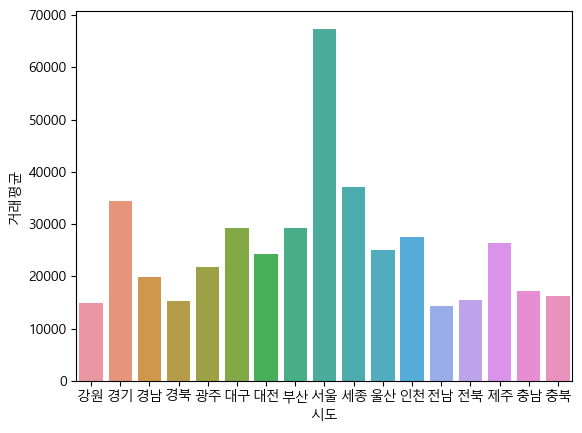

In [26]:
apartPricesi = apartCopy.groupby('시도',as_index = False).agg(거래평균 =('거래금액','mean'))
sns.barplot(data = apartPricesi,x = '시도', y = '거래평균')

In [28]:
apart2023 = apartCopy.query('거래년 == 2023')
apart2018 = apartCopy.query('거래년 == 2018')

In [30]:
a2023 = apart2023.groupby('거래년',as_index = False).agg(거래금액평균 = ('거래금액','mean'))
a2018 = apart2018.groupby('거래년',as_index = False).agg(거래금액평균 = ('거래금액','mean'))

In [31]:
pct = (a2023/a2018)*100
display(pct)

,거래년,거래금액평균
0,100.24777,120.207384


연도별 서울 평당 금액

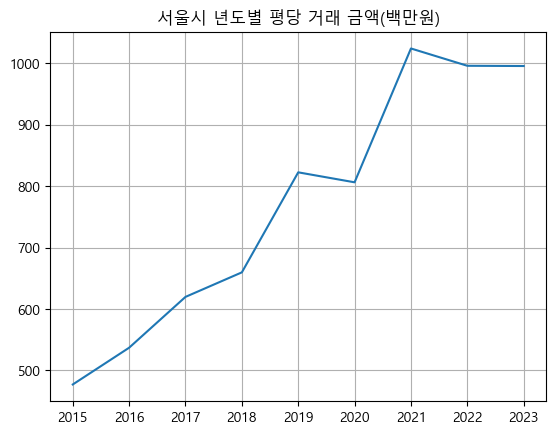

In [33]:
plt.title('서울시 년도별 평당 거래 금액(백만원)')
apartSeoul = apartCopy.query('시도 == "서울"')
apartSeoul = apartSeoul.groupby('거래년',as_index = False).agg(평당거래금액  = ('거래금액','mean'))
apartSeoul['평당거래금액'] = apartSeoul['평당거래금액'].round(1)
apartSeoul['평당거래금액(백만원)'] = apartSeoul['평당거래금액']/100
apartSeoul = apartSeoul.rename(columns = {'거래년':'서울시 년도별'})
ylabel = '평당거래금액(백만원)'
xlabe = '서울시 년도별'
plt.plot(apartSeoul['서울시 년도별'],apartSeoul['평당거래금액(백만원)'])
plt.grid()

plt.savefig('./DataFolder/서울시 년도별 평당거래금액(백만원).jpg')

In [58]:
seoul = apartCopy.query('시도 == "서울"')
seoulYear = seoul.groupby('거래년',as_index=False).agg(년도별거래금액 =('거래금액','mean'))
seoulYear['년도별거래금액'] = seoulYear['년도별거래금액'].round(1)
total = 0
for i in range(7):
    year = seoulYear['년도별거래금액'].iloc[i+1]/seoulYear['년도별거래금액'].iloc[i]
    s = (year*100).round(2)
    total += s
print(((total/7)-100).round(1))

11.6


# 위와 같이 년도별 평균 증감량이 11.6%이다

# 2024년 서울 예상 평균 아파트 값을 구해보자!

In [61]:
seoulY = seoul.groupby('거래년',as_index=False).agg(거래평균금액 = ('거래금액','mean'))
seoul2023 = seoulY['거래평균금액'].iloc[8]
print((seoul2023*1.116).round(1))

111088.0


# 약 11억 1088만원 정도 된다